In [1]:
import os
import glob
import pandas as pd

In [2]:
path = '/data_hdd5/yuseong/cs-expression/analysis/cibersortx'

## Bulk

In [34]:
tcga_sam = pd.read_csv('/data_hdd5/yuseong/cs-expression/data/bulk/TCGA/filename+sampleID.tsv', sep='\t')
tcga_sam = tcga_sam[tcga_sam['sampleType'].str.contains('Tumor')]
tcga_sam.head()

,id,filename,sampleID,projectID,sampleType
0,00223404-f5e0-464d-88f4-d3aefda8095d,9ee4ced1-ca2b-49c0-8d5d-e27e3f6c8125.rna_seq.g...,TCGA_TQ_A7RR_01A,TCGA-LGG,Primary Tumor
1,00402eef-b323-4d9d-ad07-17b808113248,00f3dc32-cdd0-4ded-8ff8-f7809cfe3883.rna_seq.g...,TCGA_E1_5318_01A,TCGA-LGG,Primary Tumor
2,0198556a-0dda-45e6-9535-67e242b721cd,b41e8836-bff3-4285-820c-b9b4d42574ac.rna_seq.g...,TCGA_HT_7695_01A,TCGA-LGG,Primary Tumor
3,01aa2363-34a6-478c-a700-08dec29a74f3,1fc94fdd-fe68-483d-9c1b-b7d8d2959a4a.rna_seq.g...,TCGA_FG_7636_01A,TCGA-LGG,Primary Tumor
4,01ae7b26-98c9-478b-9481-e2abcabd5b07,a9bdab2d-a002-4983-bfa4-4a3aa0a3c690.rna_seq.g...,TCGA_DB_A75L_01A,TCGA-LGG,Primary Tumor


In [26]:
tcga = pd.DataFrame()

for f in glob.glob(f'{path}/tcga_exp/*') :
    ex_df = pd.read_csv(f)
    tcga = pd.concat([tcga, ex_df])

tcga.head()

,project_short_name,case_barcode,sample_barcode,aliquot_barcode,HGNC_gene_symbol,gene_id,normalized_count,original_gene_symbol,platform
0,TCGA-LGG,TCGA-CS-4942,TCGA-CS-4942-01A,TCGA-CS-4942-01A-01R-1470-07,C7orf65,401335,0.3460,C7orf65,IlluminaHiSeq
1,TCGA-LGG,TCGA-CS-4942,TCGA-CS-4942-01A,TCGA-CS-4942-01A-01R-1470-07,DNM3,26052,1386.5052,DNM3,IlluminaHiSeq
2,TCGA-LGG,TCGA-CS-4942,TCGA-CS-4942-01A,TCGA-CS-4942-01A-01R-1470-07,PROC,5624,0.6920,PROC,IlluminaHiSeq
3,TCGA-LGG,TCGA-CS-4942,TCGA-CS-4942-01A,TCGA-CS-4942-01A-01R-1470-07,CD86,942,758.4775,CD86,IlluminaHiSeq
4,TCGA-LGG,TCGA-CS-4942,TCGA-CS-4942-01A,TCGA-CS-4942-01A-01R-1470-07,IGSF8,93185,1025.9516,IGSF8,IlluminaHiSeq


In [45]:
print(len(tcga))
tcga_t = tcga.copy()
tcga_t['sample_barcode'] = tcga_t['sample_barcode'].apply(lambda x : x.replace('-','_'))
tcga_t = tcga_t[tcga_t['sample_barcode'].isin(tcga_sam['sampleID'].unique())]
print(len(tcga_t))

14535948
14433293


In [46]:
tcga_t = tcga_t.drop_duplicates(subset=['HGNC_gene_symbol', 'sample_barcode'])
tcga_t = tcga_t.dropna(subset = ['HGNC_gene_symbol'])
tcga_pv = tcga_t.pivot(index = 'HGNC_gene_symbol', columns = 'sample_barcode', values = 'normalized_count')
tcga_pv.head()

sample_barcode,TCGA_02_0047_01A,TCGA_02_0055_01A,TCGA_02_2483_01A,TCGA_02_2485_01A,TCGA_02_2486_01A,TCGA_06_0125_01A,TCGA_06_0125_02A,TCGA_06_0129_01A,TCGA_06_0130_01A,TCGA_06_0132_01A,...,TCGA_VW_A8FI_01A,TCGA_W9_A837_01A,TCGA_WH_A86K_01A,TCGA_WY_A858_01A,TCGA_WY_A859_01A,TCGA_WY_A85A_01A,TCGA_WY_A85B_01A,TCGA_WY_A85C_01A,TCGA_WY_A85D_01A,TCGA_WY_A85E_01A
HGNC_gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,125.0069,391.8038,271.8522,83.9429,108.2561,201.6663,168.1040,133.7468,152.8932,129.7286,...,149.7735,25.2456,351.2079,215.5121,67.6466,78.3267,85.7186,125.9501,301.2574,129.6635
A1BG-AS1,105.3013,162.1976,109.7288,45.0667,72.2622,200.8067,179.4746,153.2037,147.9732,113.6309,...,110.7688,61.5359,119.0685,95.3466,134.8377,81.0610,90.0129,122.8606,139.6844,86.1059
A1CF,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4120,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4087,0.0000,0.0000
A2M,34012.4220,42876.2607,21058.5203,7798.5333,40971.4268,11174.9358,18105.5605,22012.3862,22147.3956,30898.9867,...,7556.2813,6456.6935,12686.8329,41695.7258,4737.4673,9310.4777,18032.2332,10934.9857,11663.1312,5672.9074
A2M-AS1,124.4599,85.4772,37.8385,11.4667,85.8902,19.1974,15.1157,23.9565,44.4559,76.8878,...,35.4946,18.7463,22.3017,43.7531,20.7301,30.2454,13.8081,13.5227,24.7387,15.1834


In [47]:
tcga_pv.insert(0, 'Gene', tcga_pv.index)
tcga_pv.head()

sample_barcode,Gene,TCGA_02_0047_01A,TCGA_02_0055_01A,TCGA_02_2483_01A,TCGA_02_2485_01A,TCGA_02_2486_01A,TCGA_06_0125_01A,TCGA_06_0125_02A,TCGA_06_0129_01A,TCGA_06_0130_01A,...,TCGA_VW_A8FI_01A,TCGA_W9_A837_01A,TCGA_WH_A86K_01A,TCGA_WY_A858_01A,TCGA_WY_A859_01A,TCGA_WY_A85A_01A,TCGA_WY_A85B_01A,TCGA_WY_A85C_01A,TCGA_WY_A85D_01A,TCGA_WY_A85E_01A
HGNC_gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,A1BG,125.0069,391.8038,271.8522,83.9429,108.2561,201.6663,168.1040,133.7468,152.8932,...,149.7735,25.2456,351.2079,215.5121,67.6466,78.3267,85.7186,125.9501,301.2574,129.6635
A1BG-AS1,A1BG-AS1,105.3013,162.1976,109.7288,45.0667,72.2622,200.8067,179.4746,153.2037,147.9732,...,110.7688,61.5359,119.0685,95.3466,134.8377,81.0610,90.0129,122.8606,139.6844,86.1059
A1CF,A1CF,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4120,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4087,0.0000,0.0000
A2M,A2M,34012.4220,42876.2607,21058.5203,7798.5333,40971.4268,11174.9358,18105.5605,22012.3862,22147.3956,...,7556.2813,6456.6935,12686.8329,41695.7258,4737.4673,9310.4777,18032.2332,10934.9857,11663.1312,5672.9074
A2M-AS1,A2M-AS1,124.4599,85.4772,37.8385,11.4667,85.8902,19.1974,15.1157,23.9565,44.4559,...,35.4946,18.7463,22.3017,43.7531,20.7301,30.2454,13.8081,13.5227,24.7387,15.1834


In [48]:
tcga_pv.to_csv(f'{path}/input/TCGA_normalized_counts.txt', sep='\t', index=False)

## Single cell

### summarize per dataset

In [72]:
sc_cell = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/sp+transcript_ver2/microexonator_input/adult_gliomas_cell+path.csv')
sc_cell.head()

,Data,Cell,Celltype,path,sample,age_range,age,gender,diagnosis,grade,...,PDGFR,MET,MGMT,1p19q,Prior_therapies,Prior_immunotherapies,Molecular_alterations,OS,outcome,major_celltype
0,DUOS108,MGH36_P10_A01,M1,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,M1
1,DUOS108,MGH36_P10_A02,AClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant
2,DUOS108,MGH36_P10_A04,OClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant
3,DUOS108,MGH36_P10_A05,AClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant
4,DUOS108,MGH36_P10_A06,AClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant


In [51]:
sorted(sc_cell.Data.unique())

['DUOS108', 'DUOS109', 'DUOS117', 'DUOS133', 'DUOS156', 'public']

In [54]:
sc_cell[sc_cell['Data'] == 'DUOS133']['sample'].unique()

array(['MGH105A', 'MGH105B', 'MGH105C', 'MGH105D', 'MGH115', 'MGH122',
       'MGH124', 'MGH129', 'MGH211', 'MGH45', 'MGH64'], dtype=object)

In [ ]:
### GSE84465_Public

In [74]:
pub_df = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/raw_tpm/GSE84465_GBM_All_data.csv', sep=' ')
pub_df.head()

,1001000173.G8,1001000173.D4,1001000173.B4,1001000173.A2,1001000173.E2,1001000173.F6,1001000173.B12,1001000173.D6,1001000173.H1,1001000173.E4,...,1001000271.C2,1001000271.D1,1001000271.B1,1001000271.A3,1001000271.E1,1001000271.F1,1001000271.D4,1001000271.C1,1001000271.H7,1001000271.H2
1/2-SBSRNA4,1,0,0,0,0,0,0,64,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG,0,0,0,0,0,0,53,0,0,229,...,7,2,0,0,0,0,61,0,0,0
A1BG-AS1,0,0,0,1,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
pub_info = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/raw_tpm/GSE84465_GBM_metadata.csv')
pub_info = pub_info[['Sample name', 'characteristics: cell type']]
pub_info.columns = ['Sample','celltype']
pub_info.head()

,Sample,celltype
0,1001000173.G8,Neoplastic
1,1001000173.D4,Oligodendrocyte
2,1001000173.B4,Neoplastic
3,1001000173.A2,Neoplastic
4,1001000173.E2,Neoplastic


In [76]:
pub_info.celltype.unique()

array(['Neoplastic', 'Oligodendrocyte', 'OPC', 'Immune cell', 'Neuron',
       'Vascular', 'Astocyte'], dtype=object)

In [77]:
for col in pub_df.columns :
    new = pub_info.loc[pub_info['Sample'] == col, 'celltype'].tolist()[0]
    if new == 'Astocyte' :
        new = 'Astrocyte'
    pub_df.rename(columns = {col : new}, inplace=True)

pub_df.head()

,Neoplastic,Oligodendrocyte,Neoplastic,Neoplastic,Neoplastic,Neoplastic,Neoplastic,OPC,Neoplastic,Neoplastic,...,Vascular,Vascular,Neoplastic,Neoplastic,Vascular,Vascular,Immune cell,Vascular,Vascular,Vascular
1/2-SBSRNA4,1,0,0,0,0,0,0,64,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG,0,0,0,0,0,0,53,0,0,229,...,7,2,0,0,0,0,61,0,0,0
A1BG-AS1,0,0,0,1,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
pub_df.columns.unique()

Index(['Neoplastic', 'Oligodendrocyte', 'OPC', 'Immune cell', 'Neuron',
       'Vascular', 'Astrocyte'],
      dtype='object')

In [73]:
sc_cell[sc_cell['Data'] == 'public'].major_celltype.unique()

array(['Oligodendrocyte', 'OPC', 'Vascular', 'Astrocyte'], dtype=object)

In [79]:
pub_f = pub_df.loc[:, pub_df.columns.isin(['Oligodendrocyte','OPC','Vascular','Astrocyte'])]
pub_f.head()

,Oligodendrocyte,OPC,Oligodendrocyte,Vascular,OPC,Oligodendrocyte,OPC,OPC,OPC,OPC,...,OPC,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular
1/2-SBSRNA4,0,64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG,0,0,61,0,0,0,0,0,0,0,...,0,25,5,7,2,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,0,0,0,0,0,0,0,0,...,0,108,0,0,0,0,0,0,0,0


In [80]:
pub_f.columns.unique()

Index(['Oligodendrocyte', 'OPC', 'Vascular', 'Astrocyte'], dtype='object')

In [81]:
pub_f.to_csv(f'{path}/sc_exp/public_considered_cells.csv')

In [ ]:
### ['DUOS108', 'DUOS109', 'DUOS117', 'DUOS133', 'DUOS156', 'public']
### GSE70630_DUOS108

In [127]:
df_108 = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/raw_tpm/GSE70630_OG_processed_data_v2.txt', sep='\t', index_col = [0])
idx = df_108.index
df_108.index = [i.split("'")[1] for i in idx]
df_108.head()

,MGH36_P6_A12,MGH36_P6_H09,MGH53_P4_G04,MGH36_P10_G12,MGH53_P2_H12,MGH53_P4_D10,MGH53_P4_D01,MGH36_P6_B07,MGH36_P10_B12,MGH53_P2_G11,...,93_P10_H06,93_P8_B12,93_P8_D09,93_P9_D11,93_P10_G08,93_P8_H06,93_P9_C07,93_P8_A12,93_P8_C01,93_P9_F06
A1BG,0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0000,0.000,0.0000,0.0000,0.02148,0.0000,0.0000,0.0000,0.52707,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,5.7056,4.437,8.0276,5.6288,0.00000,3.3367,8.7811,8.3271,7.42620,9.04620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.0000,0.000,4.5347,0.0000,0.00000,0.0000,0.0000,3.3361,0.00000,0.63134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
for col in df_108.columns :
    if '93_' in col and 'MGH' not in col:
        df_108.rename(columns = {col : col.replace('93_', 'MGH93_')}, inplace=True)
    elif '97_' in col and 'MGH' not in col:
        df_108.rename(columns = {col : col.replace('97_', 'MGH97_')}, inplace=True)

In [133]:
df_108_f = df_108.loc[:, df_108.columns.isin(sc_cell.Cell.unique())]
df_108_f.shape

(23686, 3940)

In [134]:
def chcol(info, df) :
    for col in df.columns :
        new = info.loc[info['Cell'] == col, 'major_celltype']
        if len(new) == 0 :
            print(col)
            continue
        new = new.tolist()[0]
        df.rename(columns = {col : new}, inplace=True)
    return df

In [135]:
df_108_final = chcol(sc_cell, df_108_f)

/tmp/ipykernel_3362748/921637122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {col : new}, inplace=True)


In [136]:
df_108_final.head()

,M1,M1,M1,M1,M1,M1,M1,M1,M1,M1,...,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
A1BG,0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0000,0.000,0.0000,0.0000,0.02148,0.0000,0.0000,0.0000,0.52707,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,5.7056,4.437,8.0276,5.6288,0.00000,3.3367,8.7811,8.3271,7.42620,9.04620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.0000,0.000,4.5347,0.0000,0.00000,0.0000,0.0000,3.3361,0.00000,0.63134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
df_108_final.to_csv(f'{path}/sc_exp/DUOS108_considered_cells.csv')

In [ ]:
### 109 - GSE89567

In [139]:
df_109 = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/raw_tpm/GSE89567_IDH_A_processed_data.txt',sep='\t', index_col = [0])
idx = df_109.index
df_109.index = [i.split("'")[1] for i in idx]
df_109.head()

,MGH42_P7_A01,MGH42_P7_A02,MGH42_P7_A03,MGH42_P7_A04,MGH42_P7_A05,MGH42_P7_A07,MGH42_P7_A09,MGH42_P7_A11,MGH42_P7_A12,MGH42_P7_B02,...,MGH107neg_P2_E06,MGH107pos_P2_B03,MGH107neg_P1_F03,MGH107neg_P1_G06,MGH107neg_P2_H03,MGH107neg_P2_C05,MGH107pos_P2_D07,MGH107neg_P1_E01,MGH107pos_P2_G09,MGH107neg_P1_D06
A1BG,1.1928,0.000000,0.00000,0.0000,0.0000,0.66903,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,2.4772,0.0000,0.0
A1BG-AS1,0.0000,0.000000,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.83996,0.0000,0.0000,0.0000,0.0
A1CF,0.0000,0.094912,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0
A2M,7.0439,7.609500,0.77062,7.6146,0.0000,0.00000,0.27501,8.1624,6.5655,6.9658,...,0.0,8.6046,0.0,0.0,0.0,0.00000,9.5281,0.0000,6.8999,0.0
A2M-AS1,0.0000,0.000000,0.00000,0.0000,2.0339,2.39420,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0


In [140]:
df_109_f = df_109.loc[:, df_109.columns.isin(sc_cell.Cell.unique())]
df_109_f.shape

(23686, 5988)

In [141]:
len(sc_cell[sc_cell['Data'] == 'DUOS109'].Cell.unique())

6235

In [145]:
df_109_final = chcol(sc_cell, df_109_f)

/tmp/ipykernel_3362748/921637122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {col : new}, inplace=True)


In [146]:
df_109_final.head()

,M1,M1,Malignant,M1,Malignant,Malignant,Malignant,M1,M1,M1,...,Malignant,M1,Malignant,Malignant,Malignant,Malignant,M1,Malignant,M1,Malignant
A1BG,1.1928,0.000000,0.00000,0.0000,0.0000,0.66903,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,2.4772,0.0000,0.0
A1BG-AS1,0.0000,0.000000,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.83996,0.0000,0.0000,0.0000,0.0
A1CF,0.0000,0.094912,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0
A2M,7.0439,7.609500,0.77062,7.6146,0.0000,0.00000,0.27501,8.1624,6.5655,6.9658,...,0.0,8.6046,0.0,0.0,0.0,0.00000,9.5281,0.0000,6.8999,0.0
A2M-AS1,0.0000,0.000000,0.00000,0.0000,2.0339,2.39420,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0


In [147]:
df_109_final.columns.unique()

Index(['M1', 'Malignant', 'Oligodendrocyte'], dtype='object')

In [148]:
df_109_final.to_csv(f'{path}/sc_exp/DUOS109_considered_cells.csv')

In [ ]:
### DUOS117

In [149]:
df117 = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/raw_tpm/GSE131928_Smartseq2_GBM_IDHwt_processed_TPM.tsv', sep='\t')
df117.head()

,GENE,MGH101-P1-A04,MGH101-P1-A05,MGH101-P1-A07,MGH101-P1-A09,MGH101-P1-A10,MGH101-P1-A11,MGH101-P1-B03,MGH101-P1-B04,MGH101-P1-B06,...,MGH66-P08-G07,MGH66-P08-G10,MGH66-P08-G11,MGH66-P08-H01,MGH66-P08-H02,MGH66-P08-H06,MGH66-P08-H07,MGH66-P08-H08,MGH66-P08-H10,MGH66-P08-H11
0,A1BG,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,1.157691,0.0,0.0,0.0,0.0,0.0,0.000000
1,A1BG-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096262,0.0000,...,0.0,0.0,0.0,3.841269,0.0,0.0,0.0,0.0,0.0,0.782409
2,A1CF,0.0,0.000000,0.0,0.000000,0.000000,0.012926,0.000000,0.000000,0.0229,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,A2M,0.0,5.327184,0.0,8.698337,8.205094,7.355166,5.968506,8.976143,5.7861,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,A2M-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [150]:
df117.index = df117['GENE']
del df117['GENE']
df117.head()

,MGH101-P1-A04,MGH101-P1-A05,MGH101-P1-A07,MGH101-P1-A09,MGH101-P1-A10,MGH101-P1-A11,MGH101-P1-B03,MGH101-P1-B04,MGH101-P1-B06,MGH101-P1-B09,...,MGH66-P08-G07,MGH66-P08-G10,MGH66-P08-G11,MGH66-P08-H01,MGH66-P08-H02,MGH66-P08-H06,MGH66-P08-H07,MGH66-P08-H08,MGH66-P08-H10,MGH66-P08-H11
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,1.157691,0.0,0.0,0.0,0.0,0.0,0.000000
A1BG-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096262,0.0000,0.000000,...,0.0,0.0,0.0,3.841269,0.0,0.0,0.0,0.0,0.0,0.782409
A1CF,0.0,0.000000,0.0,0.000000,0.000000,0.012926,0.000000,0.000000,0.0229,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
A2M,0.0,5.327184,0.0,8.698337,8.205094,7.355166,5.968506,8.976143,5.7861,2.589524,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
A2M-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [153]:
cols = df117.columns
df117.columns = [col.replace('-','_') for col in cols]
df117.head()

,MGH101_P1_A04,MGH101_P1_A05,MGH101_P1_A07,MGH101_P1_A09,MGH101_P1_A10,MGH101_P1_A11,MGH101_P1_B03,MGH101_P1_B04,MGH101_P1_B06,MGH101_P1_B09,...,MGH66_P08_G07,MGH66_P08_G10,MGH66_P08_G11,MGH66_P08_H01,MGH66_P08_H02,MGH66_P08_H06,MGH66_P08_H07,MGH66_P08_H08,MGH66_P08_H10,MGH66_P08_H11
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,1.157691,0.0,0.0,0.0,0.0,0.0,0.000000
A1BG-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096262,0.0000,0.000000,...,0.0,0.0,0.0,3.841269,0.0,0.0,0.0,0.0,0.0,0.782409
A1CF,0.0,0.000000,0.0,0.000000,0.000000,0.012926,0.000000,0.000000,0.0229,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
A2M,0.0,5.327184,0.0,8.698337,8.205094,7.355166,5.968506,8.976143,5.7861,2.589524,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
A2M-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [154]:
df117_f = df117.loc[:, df117.columns.isin(sc_cell.Cell.unique())]
df117_f.shape

(23686, 5442)

In [156]:
len(sc_cell[sc_cell['Data'] == 'DUOS117'].Cell.unique())

5442

In [159]:
df117_final = chcol(sc_cell, df117_f)
df117_final.head()

/tmp/ipykernel_3362748/921637122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {col : new}, inplace=True)


,M1,M1,M1,M1,M1,M1,M1,M1,M1,M1,...,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,1.157691,0.0,0.0,0.0,0.0,0.0,0.000000
A1BG-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096262,0.0000,0.000000,...,0.0,0.0,0.0,3.841269,0.0,0.0,0.0,0.0,0.0,0.782409
A1CF,0.0,0.000000,0.0,0.000000,0.000000,0.012926,0.000000,0.000000,0.0229,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
A2M,0.0,5.327184,0.0,8.698337,8.205094,7.355166,5.968506,8.976143,5.7861,2.589524,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
A2M-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [160]:
df117_final.columns.unique()

Index(['M1', 'Malignant', 'Oligodendrocyte', 'CD8T'], dtype='object')

In [161]:
df117_final.to_csv(f'{path}/sc_exp/DUOS117_considered_cells.csv')

In [210]:
### DUOS133
df133 = pd.DataFrame()
for f in glob.glob('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/raw_tpm/GSE151506/*') :
    ex_df = pd.read_csv(f, sep='\t')
    ex_df.index = ex_df['gene_name']
    del ex_df['gene_name']
    df133 = pd.concat([ex_df, df133])
    

In [211]:
df133.head()

,MGH121_Plate_2_cDNA_fromECRC5790-1_S1_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-10_S10_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-11_S11_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-12_S12_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-13_S13_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-14_S14_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-15_S15_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-16_S16_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-17_S17_L008_R1_001,MGH121_Plate_2_cDNA_fromECRC5790-18_S18_L008_R1_001,...,MGH121_Plate_3_cDNA_fromECRC5791-88_S88_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-89_S89_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-9_S9_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-90_S90_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-91_S91_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-92_S92_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-93_S93_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-94_S94_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-95_S95_L008_R1_001,MGH121_Plate_3_cDNA_fromECRC5791-96_S96_L008_R1_001
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,31.72,38.61,0.0,0.00,26.25,8.10,217.94,84.35,163.28,163.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TNMD,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPM1,117.73,30.22,0.0,362.58,102.97,45.45,79.54,416.95,3.20,92.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCYL3,0.00,0.00,0.0,81.14,0.00,46.36,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1orf112,0.00,0.00,0.0,3.14,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
add_col = []
for col in df133.columns :
    for col2 in sc_cell[sc_cell['Data'] == 'DUOS133'].Cell.unique() :
        if col2 in col :
            add_col += [col]

In [220]:
df133_f2 = df133.loc[:, df133.columns.isin(add_col)]
df133_f2.shape

(465498, 601)

In [221]:
def chcol3(info, df) :
    for col in df.columns :
        print(col)
        new = info.loc[info['Cell'] == col, 'major_celltype']
        if len(new) == 0 :
            for in_col in info[info['Data'] == 'DUOS133'].Cell.unique() :
                if in_col in col :
                    new = info.loc[info['Cell'] == in_col, 'major_celltype']
                    print(new)
                elif len(new) == 0 :
                    continue
                else : continue
        print(new)
        new = new.tolist()[0]
        df.rename(columns = {col : new}, inplace=True)
    return df

In [222]:
df133_final = chcol3(sc_cell, df133_f2)
df133_final.head()

MGH64_A1_S1_L008_R1_001
9926    Malignant
Name: major_celltype, dtype: object
9926    Malignant
Name: major_celltype, dtype: object
MGH64_A11_S11_L008_R1_001
9924    Malignant
Name: major_celltype, dtype: object
9924    Malignant
Name: major_celltype, dtype: object
MGH64_A12_S12_L008_R1_001
9925    Malignant
Name: major_celltype, dtype: object
9925    Malignant
Name: major_celltype, dtype: object
MGH64_A4_S4_L008_R1_001
9927    Malignant
Name: major_celltype, dtype: object
9927    Malignant
Name: major_celltype, dtype: object
MGH64_A5_S5_L008_R1_001
9928    Malignant
Name: major_celltype, dtype: object
9928    Malignant
Name: major_celltype, dtype: object
MGH64_A8_S8_L008_R1_001
9929    Malignant
Name: major_celltype, dtype: object
9929    Malignant
Name: major_celltype, dtype: object
MGH64_A9_S9_L008_R1_001
9930    Malignant
Name: major_celltype, dtype: object
9930    Malignant
Name: major_celltype, dtype: object
MGH64_B1_S13_L008_R1_001
9934    Malignant
Name: major_celltype, dtype: 

/tmp/ipykernel_3362748/1092672231.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {col : new}, inplace=True)


9955    Malignant
Name: major_celltype, dtype: object
9955    Malignant
Name: major_celltype, dtype: object
MGH64_E1_S49_L008_R1_001
9957    Malignant
Name: major_celltype, dtype: object
9957    Malignant
Name: major_celltype, dtype: object
MGH64_E10_S58_L008_R1_001
9956    Malignant
Name: major_celltype, dtype: object
9956    Malignant
Name: major_celltype, dtype: object
MGH64_E3_S51_L008_R1_001
9958    Malignant
Name: major_celltype, dtype: object
9958    Malignant
Name: major_celltype, dtype: object
MGH64_E4_S52_L008_R1_001
9959    Malignant
Name: major_celltype, dtype: object
9959    Malignant
Name: major_celltype, dtype: object
MGH64_E6_S54_L008_R1_001
9960    Malignant
Name: major_celltype, dtype: object
9960    Malignant
Name: major_celltype, dtype: object
MGH64_E7_S55_L008_R1_001
9961    Malignant
Name: major_celltype, dtype: object
9961    Malignant
Name: major_celltype, dtype: object
MGH64_E8_S56_L008_R1_001
9962    Malignant
Name: major_celltype, dtype: object
9962    Malign

,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,...,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TNMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPM1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCYL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1orf112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
df133_final.columns.unique()

Index(['Malignant'], dtype='object')

In [224]:
df133_final.to_csv(f'{path}/sc_exp/DUOS133_considered_cells.csv')

In [163]:
### DUOS156
df156 = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/raw_tpm/GSE163108_tpm.csv', index_col = [0])
df156.head()

,MGH120_P10_A01,MGH135_P14_E05,MGH135_P15_A03,MGH135_P15_D07,MGH135_P16_D07,MGH135_P16_G03,MGH135_P16_H05,MGH201_P4_E01,MGH206_P3_F12,MGH206_P3_H02,...,E122_CD4neg8neg_P2_D06_E122_CD4-CD8-_P1P2,E122_CD4neg8neg_P2_E02_E122_CD4-CD8-_P1P2,E122_CD4neg8neg_P2_E03_E122_CD4-CD8-_P1P2,E122_CD4neg8neg_P2_E05_E122_CD4-CD8-_P1P2,E122_CD4neg8neg_P2_E08_E122_CD4-CD8-_P1P2,E122_CD4neg8neg_P2_G05_E122_CD4-CD8-_P1P2,E122_CD4neg8neg_P2_G08_E122_CD4-CD8-_P1P2,E122_CD4neg8neg_P2_H09_E122_CD4-CD8-_P1P2,E112_CD4neg8neg_P1_G07_E112_CD4-CD8-_P1P2,E112_CD4neg8neg_P1_H12_E112_CD4-CD8-_P1P2
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,2.38
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.17,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,4.83,0.0,5.89,0.0,0.0,0.0,2.08,2.15
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00


In [164]:
df156_f = df156.loc[:, df156.columns.isin(sc_cell.Cell.unique())]
df156_f.shape

(22448, 3485)

In [166]:
len(sc_cell[sc_cell['Data'] == 'DUOS156'].Cell.unique())

7244

In [171]:
sorted([x for x in df156.columns if '122' in x])

['E122_CD4neg8neg_P1_A01_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A02_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A03_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A04_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A05_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A07_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A08_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A09_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A10_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A11_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_A12_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B01_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B02_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B03_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B04_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B07_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B08_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B09_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B10_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B11_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_B12_E122_CD4-CD8-_P1P2',
 'E122_CD4neg8neg_P1_C02_E122_CD4-

In [167]:
set(sc_cell[sc_cell['Data'] == 'DUOS156'].Cell.unique()) - set(df156_f.columns.unique())

{'E33TC_P3_G09',
 'E33TC_P4_D05',
 'E112_CD4neg8neg_P2_A08',
 'E48_P2_F09',
 'E48_P1_H06',
 'E122_CD4neg8neg_P2_D03',
 'E124_P1_D08',
 'E124_P2_F03',
 'E112_CD4pos8pos_P2_E05',
 'E121_P1_B11',
 'E112_CD4neg8neg_P1_A04',
 'E92_P4_E06',
 'E36TC_P1_D01',
 'E90_P3_B09',
 'E122_CD4neg8neg_P1_A12',
 'E_42_P5_D12',
 'E92_P2_A08',
 'E83_P4_E06',
 'E_42_P3_G12',
 'E122_CD4pos8pos_P1_G11',
 'E36TC_P4_F05',
 'E33TC_P4_H08',
 'E60_P3_C08',
 'E124_P2_E05',
 'E92_P1_G07',
 'E79_P2_A07',
 'E122_CD4neg8neg_P1_G09',
 'E124_P3_E02',
 'E124_P3_E03',
 'E112_CD4neg8neg_P1_H06',
 'E36TC_P2_H06',
 'E121_P1_F09',
 'E60_P4_A02',
 'E36TC_P2_G06',
 'E60_P3_D07',
 'E47_P3_G05',
 'E47_P3_E08',
 'E36TC_P3_A07',
 'E124_P4_D03',
 'E112_CD4pos8pos_P1_B12',
 'E60_P3_C03',
 'E36TC_P3_G06',
 'E36TC_P4_A01',
 'E79_P2_D02',
 'E92_P2_F07',
 'E124CD4_8_P1_H05',
 'E122_CD4neg8neg_P1_B12',
 'E112_CD4neg8neg_P2_F12',
 'E60_P4_H01',
 'E92_P2_A03',
 'E112_CD4pos8pos_P1_B09',
 'E83_P3_E07',
 'E83_P2_D12',
 'E83_P3_G05',
 'E36TC_P2

In [172]:
add_col = []
for col in df156.columns :
    for col2 in sc_cell[sc_cell['Data'] == 'DUOS156'].Cell.unique() :
        if col2 in col :
            add_col += [col]

In [195]:
df156_f2 = df156.loc[:, df156.columns.isin(add_col)]
df156_f2.shape

(22448, 7324)

In [196]:
sc_cell.head()

,Data,Cell,Celltype,path,sample,age_range,age,gender,diagnosis,grade,...,PDGFR,MET,MGMT,1p19q,Prior_therapies,Prior_immunotherapies,Molecular_alterations,OS,outcome,major_celltype
0,DUOS108,MGH36_P10_A01,M1,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,M1
1,DUOS108,MGH36_P10_A02,AClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant
2,DUOS108,MGH36_P10_A04,OClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant
3,DUOS108,MGH36_P10_A05,AClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant
4,DUOS108,MGH36_P10_A06,AClikeMalignant,/data_hdd4/yuseong/raw_data/smart-seq2/DUOS108...,MGH36,adult,67.0,M,oligodendroglioma,II / III,...,NaN,NaN,NaN,1p19q loss,NaN,NaN,R132H,NaN,NaN,Malignant


In [197]:
def chcol2(info, df) :
    for col in df.columns :
        print(col)
        new = info.loc[info['Cell'] == col, 'major_celltype']
        if len(new) == 0 :
            for in_col in info[info['Data'] == 'DUOS156'].Cell.unique() :
                if in_col in col :
                    new = info.loc[info['Cell'] == in_col, 'major_celltype']
                    print(new)
                elif len(new) == 0 :
                    continue
                else : continue
        print(new)
        new = new.tolist()[0]
        df.rename(columns = {col : new}, inplace=True)
    return df

In [198]:
df156_final = chcol2(sc_cell, df156_f2)
df156_final.head()

MGH120_P10_A01
9983    CD4T
Name: major_celltype, dtype: object
MGH135_P14_E05
9984    CD4T
Name: major_celltype, dtype: object
MGH135_P15_A03
9985    CD4T
Name: major_celltype, dtype: object
MGH135_P15_D07
9986    CD4T
Name: major_celltype, dtype: object
MGH135_P16_D07
9987    CD4T
Name: major_celltype, dtype: object
MGH135_P16_G03
9988    CD4T
Name: major_celltype, dtype: object
MGH135_P16_H05
9989    CD4T
Name: major_celltype, dtype: object
MGH201_P4_E01
9990    CD4T
Name: major_celltype, dtype: object
MGH206_P3_F12
9991    CD4T
Name: major_celltype, dtype: object
MGH206_P3_H02
9992    CD4T
Name: major_celltype, dtype: object
MGH207_P1_D03
9993    CD4T
Name: major_celltype, dtype: object
MGH207_P4_G06
9994    CD4T
Name: major_celltype, dtype: object
MGH225_P1_C08
9995    CD4T
Name: major_celltype, dtype: object
MGH225_P1_H01
9996    CD4T
Name: major_celltype, dtype: object
MGH225_P8_E11
13700    CD8T
Name: major_celltype, dtype: object
MGH225_P6_D09
9997    CD4T
Name: major_celltype

/tmp/ipykernel_3362748/392950077.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {col : new}, inplace=True)


10004    CD4T
Name: major_celltype, dtype: object
10004    CD4T
Name: major_celltype, dtype: object
E60_P4_D12_E48.2_CD4+CD8+_P3P4
10005    CD4T
Name: major_celltype, dtype: object
10005    CD4T
Name: major_celltype, dtype: object
E124_P3_H03_E124_CD4+CD8+_P3P4
10006    CD4T
Name: major_celltype, dtype: object
10006    CD4T
Name: major_celltype, dtype: object
E124_P3_H07_E124_CD4+CD8+_P3P4
10007    CD4T
Name: major_celltype, dtype: object
10007    CD4T
Name: major_celltype, dtype: object
MGH200_P1_F11
10008    CD4T
Name: major_celltype, dtype: object
E60_P4_F01_E48.2_CD4+CD8+_P3P4
10009    CD4T
Name: major_celltype, dtype: object
10009    CD4T
Name: major_celltype, dtype: object
E124_P3_H11_E124_CD4+CD8+_P3P4
10010    CD4T
Name: major_celltype, dtype: object
10010    CD4T
Name: major_celltype, dtype: object
MGH209_P2_A08
13705    CD8T
Name: major_celltype, dtype: object
MGH135_P16_A02
10011    CD4T
Name: major_celltype, dtype: object
MGH135_P16_G07
13706    CD8T
Name: major_celltype, d

,CD4T,CD4T,CD4T,CD4T,CD4T,CD4T,CD4T,CD4T,CD4T,CD4T,...,CD8T,CD8T,CD8T,CD8T,CD8T,CD8T,CD8T,CD8T,CD8T,CD8T
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,2.38
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.17,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,4.83,0.0,5.89,0.0,0.0,0.0,2.08,2.15
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00


In [199]:
df156_final.columns.unique()

Index(['CD4T', 'CD8T', 'Treg'], dtype='object')

In [200]:
df156_final.to_csv(f'{path}/sc_exp/DUOS156_considered_cells.csv')

### merge 

In [3]:
files = sorted(glob.glob('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/*csv'))
files

['/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/DUOS108_considered_cells.csv',
 '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/DUOS109_considered_cells.csv',
 '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/DUOS117_considered_cells.csv',
 '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/DUOS133_considered_cells.csv',
 '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/DUOS156_considered_cells.csv',
 '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/sc_exp/public_considered_cells.csv']

In [4]:
df1 = pd.read_csv(files[0])
df1.rename(columns = {'Unnamed: 0' : 'GeneSymbol'}, inplace=True)
df1.head()

,GeneSymbol,M1,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M1.8,...,Malignant.3699,Malignant.3700,Malignant.3701,Malignant.3702,Malignant.3703,Malignant.3704,Malignant.3705,Malignant.3706,Malignant.3707,Malignant.3708
0,A1BG,0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A1CF,0.0000,0.000,0.0000,0.0000,0.02148,0.0000,0.0000,0.0000,0.52707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A2M,5.7056,4.437,8.0276,5.6288,0.00000,3.3367,8.7811,8.3271,7.42620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A2M-AS1,0.0000,0.000,4.5347,0.0000,0.00000,0.0000,0.0000,3.3361,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df2 = pd.read_csv(files[1])
df2.rename(columns = {'Unnamed: 0' : 'GeneSymbol'}, inplace=True)
df2.head()

,GeneSymbol,M1,M1.1,Malignant,M1.2,Malignant.1,Malignant.2,Malignant.3,M1.3,M1.4,...,Malignant.4902,M1.980,Malignant.4903,Malignant.4904,Malignant.4905,Malignant.4906,M1.981,Malignant.4907,M1.982,Malignant.4908
0,A1BG,1.1928,0.000000,0.00000,0.0000,0.0000,0.66903,0.00000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,2.4772,0.0000,0.0
1,A1BG-AS1,0.0000,0.000000,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.83996,0.0000,0.0000,0.0000,0.0
2,A1CF,0.0000,0.094912,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0
3,A2M,7.0439,7.609500,0.77062,7.6146,0.0000,0.00000,0.27501,8.1624,6.5655,...,0.0,8.6046,0.0,0.0,0.0,0.00000,9.5281,0.0000,6.8999,0.0
4,A2M-AS1,0.0000,0.000000,0.00000,0.0000,2.0339,2.39420,0.00000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0


In [6]:
df3 = pd.read_csv(files[2])
df3.rename(columns = {'GENE' : 'GeneSymbol'}, inplace=True)
df3.head()

,GeneSymbol,M1,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M1.8,...,Malignant.4604,Malignant.4605,Malignant.4606,Malignant.4607,Malignant.4608,Malignant.4609,Malignant.4610,Malignant.4611,Malignant.4612,Malignant.4613
0,A1BG,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,1.157691,0.0,0.0,0.0,0.0,0.0,0.000000
1,A1BG-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096262,0.0000,...,0.0,0.0,0.0,3.841269,0.0,0.0,0.0,0.0,0.0,0.782409
2,A1CF,0.0,0.000000,0.0,0.000000,0.000000,0.012926,0.000000,0.000000,0.0229,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,A2M,0.0,5.327184,0.0,8.698337,8.205094,7.355166,5.968506,8.976143,5.7861,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,A2M-AS1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [7]:
df4= pd.read_csv(files[3])
df4.rename(columns = {'gene_name' : 'GeneSymbol'}, inplace=True)
df4.head()

,GeneSymbol,Malignant,Malignant.1,Malignant.2,Malignant.3,Malignant.4,Malignant.5,Malignant.6,Malignant.7,Malignant.8,...,Malignant.591,Malignant.592,Malignant.593,Malignant.594,Malignant.595,Malignant.596,Malignant.597,Malignant.598,Malignant.599,Malignant.600
0,TSPAN6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TNMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DPM1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCYL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C1orf112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df5 = pd.read_csv(files[4])
df5.rename(columns = {'Unnamed: 0' : 'GeneSymbol'}, inplace=True)
df5.head()

,GeneSymbol,CD4T,CD4T.1,CD4T.2,CD4T.3,CD4T.4,CD4T.5,CD4T.6,CD4T.7,CD4T.8,...,CD8T.2924,CD8T.2925,CD8T.2926,CD8T.2927,CD8T.2928,CD8T.2929,CD8T.2930,CD8T.2931,CD8T.2932,CD8T.2933
0,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
1,A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,2.38
2,A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.17,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
3,A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,4.83,0.0,5.89,0.0,0.0,0.0,2.08,2.15
4,A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00


In [9]:
df6 = pd.read_csv(files[5])
df6.rename(columns = {'Unnamed: 0' : 'GeneSymbol'}, inplace=True)
df6.head()

,GeneSymbol,Oligodendrocyte,OPC,Oligodendrocyte.1,Vascular,OPC.1,Oligodendrocyte.2,OPC.2,OPC.3,OPC.4,...,OPC.405,Vascular.42,Vascular.43,Vascular.44,Vascular.45,Vascular.46,Vascular.47,Vascular.48,Vascular.49,Vascular.50
0,1/2-SBSRNA4,0,64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A1BG,0,0,61,0,0,0,0,0,0,...,0,25,5,7,2,0,0,0,0,0
2,A1BG-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A1CF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A2LD1,0,0,0,0,0,0,0,0,0,...,0,108,0,0,0,0,0,0,0,0


In [10]:
for dat in [df1, df2, df3, df4, df5,df6] :
    print(dat.shape)

(23686, 3941)
(23686, 5989)
(23686, 5443)
(465498, 602)
(22448, 7325)
(23465, 631)


In [11]:
from functools import reduce

ls = reduce(lambda x, y: x & y, map(lambda df: set(df.GeneSymbol.unique()), [df1, df2, df3, df4, df5, df6]))

In [12]:
len(ls)

18985

In [13]:
df_ls = [df1, df2, df3, df4, df5,df6]
df = df_ls[0].copy()
n = 1
for dat in df_ls[1:] :
    dat = dat[dat.GeneSymbol.isin(ls)]
    df = pd.merge(df, dat, how = 'inner', on='GeneSymbol', suffixes= (f'_{n}', f'_{n+1}'))
    print(df.shape)
    n+=2

(18985, 9929)
(18985, 15371)
(341730, 15972)
(341730, 23296)
(341730, 23926)


In [15]:
df.head()

,GeneSymbol,M1_1,M1.1_1,M1.2_1,M1.3_1,M1.4_1,M1.5_1,M1.6_1,M1.7_1,M1.8_1,...,OPC.405,Vascular.42,Vascular.43,Vascular.44,Vascular.45,Vascular.46,Vascular.47,Vascular.48,Vascular.49,Vascular.50
0,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,5,7,2,0,0,0,0,0
1,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,5,7,2,0,0,0,0,0
2,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,5,7,2,0,0,0,0,0
3,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,5,7,2,0,0,0,0,0
4,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,5,7,2,0,0,0,0,0


In [12]:
len(df), len(df.drop_duplicates())

(341730, 227820)

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(227820, 23926)

In [42]:
df_g = df.groupby(by='GeneSymbol').mean().reset_index()
df_g.shape

(18985, 23926)

In [43]:
df_g.head()

,GeneSymbol,M1_1,M1.1_1,M1.2_1,M1.3_1,M1.4_1,M1.5_1,M1.6_1,M1.7_1,M1.8_1,...,OPC.405,Vascular.42,Vascular.43,Vascular.44,Vascular.45,Vascular.46,Vascular.47,Vascular.48,Vascular.49,Vascular.50
0,A1BG,0.0000,0.000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,25.0,5.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,0.0000,0.000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A1CF,0.0000,0.000,0.00000,0.0000,0.02148,0.0000,0.0000,0.0000,0.52707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A2M,5.7056,4.437,8.02760,5.6288,0.00000,3.3367,8.7811,8.3271,7.42620,...,0.0,102.0,411.0,0.0,12.0,0.0,0.0,61.0,0.0,285.0
4,A2ML1,0.0000,0.000,0.32077,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
cols = df_g.columns
new_cols = [col.split('_')[0].split('.')[0] for col in cols]

df_g.columns = new_cols
df_g.head()

,GeneSymbol,M1,M1,M1,M1,M1,M1,M1,M1,M1,...,OPC,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular
0,A1BG,0.0000,0.000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,25.0,5.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,0.0000,0.000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A1CF,0.0000,0.000,0.00000,0.0000,0.02148,0.0000,0.0000,0.0000,0.52707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A2M,5.7056,4.437,8.02760,5.6288,0.00000,3.3367,8.7811,8.3271,7.42620,...,0.0,102.0,411.0,0.0,12.0,0.0,0.0,61.0,0.0,285.0
4,A2ML1,0.0000,0.000,0.32077,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
ls = list(df_g.columns)
for ct in set(ls) :
    print(ct)
    print(ls.count(ct))

Vascular
51
OPC
406
Astrocyte
88
GeneSymbol
1
Oligodendrocyte
448
Malignant
13833
Treg
599
M1
1694
CD8T
3015
CD4T
3791


In [46]:
df_g.head()

,GeneSymbol,M1,M1,M1,M1,M1,M1,M1,M1,M1,...,OPC,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular,Vascular
0,A1BG,0.0000,0.000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,25.0,5.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,0.0000,0.000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A1CF,0.0000,0.000,0.00000,0.0000,0.02148,0.0000,0.0000,0.0000,0.52707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A2M,5.7056,4.437,8.02760,5.6288,0.00000,3.3367,8.7811,8.3271,7.42620,...,0.0,102.0,411.0,0.0,12.0,0.0,0.0,61.0,0.0,285.0
4,A2ML1,0.0000,0.000,0.32077,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_dna = df_g.dropna()
df_dna.shape

(18980, 23926)

In [48]:
df_dna.to_csv(f'{path}/input/SC_TPM.txt', sep='\t', index=False)

In [49]:
df_dna.columns.unique()

Index(['GeneSymbol', 'M1', 'Malignant', 'Oligodendrocyte', 'CD8T', 'CD4T',
       'Treg', 'OPC', 'Vascular', 'Astrocyte'],
      dtype='object')

In [25]:
df_g.shape

(18985, 23926)

## Cibersortx Run

In [ ]:
### command
### docker run -v absolute/path/to/input/dir:/src/data -v absolute/path/to/output/dir:/src/outdir cibersortx/fractions \
### --username email_address_registered_on_CIBERSORTx_website --token token_obtained_from_CIBERSORTx_website --single_cell TRUE \
###--refsample Fig2ab-NSCLC_PBMCs_scRNAseq_refsample.txt --mixture Fig2b-WholeBlood_RNAseq.txt --fraction 0 --rmbatchSmode TRUE 


In [10]:
import pandas as pd

In [11]:
df1 = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/input/SC_TPM.txt', sep='\t')
df2 = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/input/TCGA_normalized_counts.txt', sep='\t')

In [12]:
df3 = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/output/test/CIBERSORTx_Adjusted.txt', sep='\t')
print(df1.head())
print(df2.head())
print(df3.head())

  GeneSymbol      M1   M1.1     M1.2    M1.3     M1.4    M1.5    M1.6    M1.7  \
0       A1BG  0.0000  0.000  0.00000  0.0000  0.00000  0.0000  0.0000  0.0000   
1   A1BG-AS1  0.0000  0.000  0.00000  0.0000  0.00000  0.0000  0.0000  0.0000   
2       A1CF  0.0000  0.000  0.00000  0.0000  0.02148  0.0000  0.0000  0.0000   
3        A2M  5.7056  4.437  8.02760  5.6288  0.00000  3.3367  8.7811  8.3271   
4      A2ML1  0.0000  0.000  0.32077  0.0000  0.00000  0.0000  0.0000  0.0000   

      M1.8  ...  OPC.405  Vascular.42  Vascular.43  Vascular.44  Vascular.45  \
0  0.00000  ...      0.0         25.0          5.0          7.0          2.0   
1  0.00000  ...      0.0          0.0          0.0          0.0          0.0   
2  0.52707  ...      0.0          0.0          0.0          0.0          0.0   
3  7.42620  ...      0.0        102.0        411.0          0.0         12.0   
4  0.00000  ...      0.0          0.0          0.0          0.0          0.0   

   Vascular.46  Vascular.47  Vas

In [16]:
df1.head(3).to_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/in_SC_TPM_3lines.txt', sep='\t', index=False)
df2.head(3).to_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/in_TCGA_normalized_counts_3lines.txt', sep='\t', index=False)
df3.head(3).to_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/out_CIBERSORTx_Adjusted_3lines.txt',sep='\t', index=False)

In [8]:
sc_in = '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/input'
bulk = 'TCGA_normalized_counts.txt'
sc = 'SC_TPM.txt'
name = 'yuseong@khu.ac.kr'
token = '3abd9af721fb294437f992c6094af689'
out_p = '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/output'

# f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --single_cell TRUE --refsample SC_TPM.txt --mixture {bulk} --fraction 0 rmbatchSamode TRUE'
f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --single_cell TRUE --refsample {sc} --mixture {bulk} --rmbatchBmode TRUE'

'docker run -v /data_hdd5/yuseong/cs-expression/analysis/cibersortx/input:/src/data/ -v /data_hdd5/yuseong/cs-expression/analysis/cibersortx/output:/src/outdir cibersortx/fractions --username yuseong@khu.ac.kr --token 3abd9af721fb294437f992c6094af689 --single_cell TRUE --refsample SC_TPM.txt --mixture TCGA_normalized_counts.txt --rmbatchBmode TRUE'

In [ ]:
### others

In [6]:
sc_in = '/home/yuseong2/sj'
name = 'yuseong@khu.ac.kr'
token = '3abd9af721fb294437f992c6094af689'
out_p = '/home/yuseong2/sj/output'

f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --refsample tpm.txt --phenoclasses phenotype.txt'

'docker run -v /home/yuseong2/sj:/src/data/ -v /home/yuseong2/sj/output:/src/outdir cibersortx/fractions --username yuseong@khu.ac.kr --token 3abd9af721fb294437f992c6094af689 --refsample tpm.txt --phenoclasses phenotype.txt'

In [7]:
sc_in = '/home/yuseong2/sj/22'
name = 'yuseong@khu.ac.kr'
token = '3abd9af721fb294437f992c6094af689'
out_p = '/home/yuseong2/sj/22/output'

f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --refsample tpm.txt --sigmatrix sig.txt'

'docker run -v /home/yuseong2/sj/22:/src/data/ -v /home/yuseong2/sj/22/output:/src/outdir cibersortx/fractions --username yuseong@khu.ac.kr --token 3abd9af721fb294437f992c6094af689 --refsample tpm.txt --sigmatrix sig.txt'

In [19]:
sc_in = '/home/yuseong2/sj/33'
name = 'yuseong@khu.ac.kr'
token = '3abd9af721fb294437f992c6094af689'
out_p = '/home/yuseong2/sj/33/output'

f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --mixture deconv_tpm.txt --sigmatrix sig.txt'

'docker run -v /home/yuseong2/sj/33:/src/data/ -v /home/yuseong2/sj/33/output:/src/outdir cibersortx/fractions --username yuseong@khu.ac.kr --token 3abd9af721fb294437f992c6094af689 --mixture deconv_tpm.txt --sigmatrix sig.txt'

In [21]:
sc_in = '/home/yuseong2/sj/33'
name = 'yuseong@khu.ac.kr'
token = '3abd9af721fb294437f992c6094af689'
out_p = '/home/yuseong2/sj/33/output_2'

f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --mixture deconv_tpm.txt --refsample tpm.txt --phenoclasses phenotype.txt'

'docker run -v /home/yuseong2/sj/33:/src/data/ -v /home/yuseong2/sj/33/output_2:/src/outdir cibersortx/fractions --username yuseong@khu.ac.kr --token 3abd9af721fb294437f992c6094af689 --mixture deconv_tpm.txt --refsample tpm.txt --phenoclasses phenotype.txt'

In [9]:
import pandas as pd
t = pd.read_csv('/home/yuseong2/sj/22/tpm.txt', sep='\t')
t.head()

,genes,TCGA.DQ.5624.01,TCGA.DQ.7591.01,TCGA.CV.5976.01,TCGA.CV.6948.01,TCGA.CV.A6K0.01,TCGA.BA.6870.01,TCGA.CV.6955.01,TCGA.P3.A5Q6.01,TCGA.QK.A64Z.01,...,TCGA.CN.6011.01,TCGA.CV.5432.01,TCGA.CQ.5324.01,TCGA.CV.5436.01,TCGA.QK.A6VC.01,TCGA.BB.7863.01,TCGA.P3.A5Q5.01,TCGA.BB.4217.01,TCGA.TN.A7HJ.01,TCGA.CR.6470.01
0,5S_rRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5_8S_rRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7SK,1.502857,1.080017,3.220046,2.897229,0.624302,1.765685,0.574304,1.111463,0.717155,...,1.829986,2.964267,0.987147,2.180034,4.507100,0.645696,30.377667,1.880004,2.335746,1.825678
3,A1BG,21.629573,20.380665,3.810080,7.240055,18.170429,8.040140,1.840013,28.839015,20.380665,...,34.801041,15.650185,2.600061,3.330103,7.129978,2.840002,10.590243,12.280373,3.569930,20.249702
4,A1BG-AS1,4.339917,4.039965,0.360007,2.180015,8.060230,2.870093,0.370002,3.129949,8.120240,...,9.239686,2.160001,0.649987,0.739977,0.999971,0.109998,2.859961,2.520007,0.459988,3.489902


In [11]:
t.isna().sum()

genes              0
TCGA.DQ.5624.01    0
TCGA.DQ.7591.01    0
TCGA.CV.5976.01    0
TCGA.CV.6948.01    0
                  ..
TCGA.BB.7863.01    0
TCGA.P3.A5Q5.01    0
TCGA.BB.4217.01    0
TCGA.TN.A7HJ.01    0
TCGA.CR.6470.01    0
Length: 565, dtype: int64

In [15]:
t.isnull().values.any()

np.False_

In [12]:
s = pd.read_csv('/home/yuseong2/sj/22/sig.txt', sep='\t')
s.head()

,genes,S0Gy,S10Gy,SP,SS
0,5S_rRNA,1.000000,1.016326,1.000000,1.00000
1,7SK,1.000000,1.000000,1.000000,1.00000
2,A1BG,1.063075,1.000000,1.063698,1.07534
3,A1BG-AS1,1.000000,1.000000,1.077232,1.00000
4,A1CF,1.000000,1.088887,1.091340,1.11134


In [16]:
s.isnull().values.any()

np.False_

In [3]:
print('docker run -v absolute/path/to/input/dir:/src/data -v absolute/path/to/output/dir:/src/outdir cibersortx/fractions --username email_address_registered_on_CIBERSORTx_website --token token_obtained_from_CIBERSORTx_website --refsample reference_purified_GSE11103.txt --phenoclasses phenoclasses_GSE11103.txt --mixture mixture_GSE11103.txt  --QN TRUE')

docker run -v absolute/path/to/input/dir:/src/data -v absolute/path/to/output/dir:/src/outdir cibersortx/fractions --username email_address_registered_on_CIBERSORTx_website --token token_obtained_from_CIBERSORTx_website --refsample reference_purified_GSE11103.txt --phenoclasses phenoclasses_GSE11103.txt --mixture mixture_GSE11103.txt  --QN TRUE


In [2]:
sc_in = '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/input'
bulk = 'TCGA_normalized_counts.txt'
sc = 'SC_TPM.txt'
name = 'yuseong@khu.ac.kr'
token = '3abd9af721fb294437f992c6094af689'
out_p = '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/output'

# f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --single_cell TRUE --refsample SC_TPM.txt --mixture {bulk} --fraction 0 --rmbatchBmode TRUE'
f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --single_cell TRUE --refsample SC_TPM.txt --mixture {bulk} --rmbatchBmode TRUE'

'docker run -v /data_hdd5/yuseong/cs-expression/analysis/cibersortx/input:/src/data/ -v /data_hdd5/yuseong/cs-expression/analysis/cibersortx/output:/src/outdir cibersortx/fractions --username yuseong@khu.ac.kr --token 3abd9af721fb294437f992c6094af689 --single_cell TRUE --refsample SC_TPM.txt --mixture TCGA_normalized_counts.txt --rmbatchBmode TRUE'

In [3]:
sc_in = '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/input'
bulk = 'Placenta_gene_exp_tab.txt'
sc = 'ref_sample_filtered_merged_genes.txt'
name = 'yuseong@khu.ac.kr'
token = '3abd9af721fb294437f992c6094af689'
out_p = '/data_hdd5/yuseong/cs-expression/analysis/cibersortx/output/test'

# f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/fractions --username {name} --token {token} --single_cell TRUE --refsample {sc} --mixture {bulk} --rmbatchSmode TRUE'
f'docker run -v {sc_in}:/src/data/ -v {out_p}:/src/outdir cibersortx/hires --username {name} --token {token} --mixture SC_TPM.txt --sigmatrix CIBERSORTx_SC_TPM_inferred_phenoclasses.CIBERSORTx_SC_TPM_inferred_refsample.bm.K999.txt'

'docker run -v /data_hdd5/yuseong/cs-expression/analysis/cibersortx/input:/src/data/ -v /data_hdd5/yuseong/cs-expression/analysis/cibersortx/output/test:/src/outdir cibersortx/hires --username yuseong@khu.ac.kr --token 3abd9af721fb294437f992c6094af689 --mixture SC_TPM.txt --sigmatrix CIBERSORTx_SC_TPM_inferred_phenoclasses.CIBERSORTx_SC_TPM_inferred_refsample.bm.K999.txt'

## PLOT

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
import pandas as pd
import glob
import os

In [243]:
result = pd.read_csv('/data_hdd5/yuseong/cs-expression/analysis/cibersortx/output/fractions_0.75/CIBERSORTx_Results.txt', sep='\t')
result.head()

,Mixture,M1,Malignant,Oligodendrocyte,CD8T,CD4T,Treg,OPC,Vascular,Astrocyte,P-value,Correlation,RMSE
0,TCGA_02_0047_01A,0.097261,0.357141,0.082981,0.006907,0.000000,0.043788,0.120965,0.116223,0.174734,9999.0,0.259999,0.967473
1,TCGA_02_0055_01A,0.182332,0.214839,0.022101,0.000000,0.129015,0.052033,0.000000,0.370643,0.029036,9999.0,0.629871,0.797931
2,TCGA_02_2483_01A,0.088461,0.626382,0.011607,0.000000,0.096792,0.003054,0.024594,0.117162,0.031949,9999.0,0.660645,0.850749
3,TCGA_02_2485_01A,0.048550,0.577500,0.018507,0.000000,0.031156,0.012525,0.040604,0.108654,0.162504,9999.0,0.502115,0.891757
4,TCGA_02_2486_01A,0.263480,0.245397,0.138666,0.000000,0.060776,0.069385,0.000000,0.118526,0.103770,9999.0,0.298229,0.955036


In [244]:
tcga = pd.read_csv('/data_hdd5/yuseong/cs-expression/data/bulk/TCGA/filename+sampleID.tsv', sep='\t')
tcga = tcga[['sampleID','projectID']]
tcga.columns = ['Mixture','projectID']
tcga.head()

,Mixture,projectID
0,TCGA_TQ_A7RR_01A,TCGA-LGG
1,TCGA_E1_5318_01A,TCGA-LGG
2,TCGA_HT_7695_01A,TCGA-LGG
3,TCGA_FG_7636_01A,TCGA-LGG
4,TCGA_DB_A75L_01A,TCGA-LGG


In [245]:
result = pd.merge(result, tcga, how='inner', on ='Mixture')
result.head()

,Mixture,M1,Malignant,Oligodendrocyte,CD8T,CD4T,Treg,OPC,Vascular,Astrocyte,P-value,Correlation,RMSE,projectID
0,TCGA_02_0047_01A,0.097261,0.357141,0.082981,0.006907,0.000000,0.043788,0.120965,0.116223,0.174734,9999.0,0.259999,0.967473,TCGA-GBM
1,TCGA_02_0055_01A,0.182332,0.214839,0.022101,0.000000,0.129015,0.052033,0.000000,0.370643,0.029036,9999.0,0.629871,0.797931,TCGA-GBM
2,TCGA_02_2483_01A,0.088461,0.626382,0.011607,0.000000,0.096792,0.003054,0.024594,0.117162,0.031949,9999.0,0.660645,0.850749,TCGA-GBM
3,TCGA_02_2485_01A,0.048550,0.577500,0.018507,0.000000,0.031156,0.012525,0.040604,0.108654,0.162504,9999.0,0.502115,0.891757,TCGA-GBM
4,TCGA_02_2486_01A,0.263480,0.245397,0.138666,0.000000,0.060776,0.069385,0.000000,0.118526,0.103770,9999.0,0.298229,0.955036,TCGA-GBM


In [215]:
min(result['RMSE']), max(result['RMSE'])

(0.691716336659421, 1.0265288037141995)

In [218]:
min(result['M1']), max(result['M1']), result['M1'].median(), result['M1'].mean()

(0.0,
 0.4076031639101868,
 np.float64(0.0573072127726253),
 np.float64(0.07061830793755293))

In [221]:
r_d = result.describe()
r_d

,M1,Malignant,Oligodendrocyte,CD8T,CD4T,Treg,OPC,Vascular,Astrocyte,P-value,Correlation,RMSE
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.0,703.000000,703.000000
mean,0.070618,0.429737,0.117055,0.000266,0.039195,0.012137,0.094707,0.055965,0.180320,9999.0,0.485568,0.889092
std,0.059592,0.119913,0.106231,0.001400,0.047867,0.017464,0.072070,0.070967,0.088959,0.0,0.127164,0.053243
min,0.000000,0.022134,0.000000,0.000000,0.000000,0.000000,0.000000,0.001312,0.000000,9999.0,0.155325,0.691716
25%,0.025950,0.359417,0.044409,0.000000,0.004678,0.000000,0.040221,0.011332,0.116406,9999.0,0.397523,0.858387
50%,0.057307,0.440485,0.085451,0.000000,0.025647,0.002597,0.081997,0.026310,0.174076,9999.0,0.490359,0.894140
75%,0.097521,0.511885,0.160988,0.000000,0.053377,0.019561,0.132732,0.077403,0.239023,9999.0,0.579937,0.925613
max,0.407603,0.732519,0.671093,0.018017,0.370701,0.109153,0.509714,0.633015,0.560995,9999.0,0.800387,1.026529


In [222]:
r_d[1:]

,M1,Malignant,Oligodendrocyte,CD8T,CD4T,Treg,OPC,Vascular,Astrocyte,P-value,Correlation,RMSE
mean,0.070618,0.429737,0.117055,0.000266,0.039195,0.012137,0.094707,0.055965,0.180320,9999.0,0.485568,0.889092
std,0.059592,0.119913,0.106231,0.001400,0.047867,0.017464,0.072070,0.070967,0.088959,0.0,0.127164,0.053243
min,0.000000,0.022134,0.000000,0.000000,0.000000,0.000000,0.000000,0.001312,0.000000,9999.0,0.155325,0.691716
25%,0.025950,0.359417,0.044409,0.000000,0.004678,0.000000,0.040221,0.011332,0.116406,9999.0,0.397523,0.858387
50%,0.057307,0.440485,0.085451,0.000000,0.025647,0.002597,0.081997,0.026310,0.174076,9999.0,0.490359,0.894140
75%,0.097521,0.511885,0.160988,0.000000,0.053377,0.019561,0.132732,0.077403,0.239023,9999.0,0.579937,0.925613
max,0.407603,0.732519,0.671093,0.018017,0.370701,0.109153,0.509714,0.633015,0.560995,9999.0,0.800387,1.026529


In [225]:
l_d = result[result['projectID'] == 'TCGA-LGG'].describe()
l_d[['Oligodendrocyte','OPC','Astrocyte','Vascular']]

,Oligodendrocyte,OPC,Astrocyte,Vascular
count,534.000000,534.000000,534.000000,534.000000
mean,0.130834,0.110986,0.192323,0.031287
std,0.112199,0.071356,0.092273,0.044514
min,0.000000,0.000000,0.000000,0.001312
25%,0.054049,0.059017,0.126171,0.009812
50%,0.098312,0.099734,0.191565,0.017017
75%,0.175683,0.154359,0.252443,0.036494
max,0.671093,0.509714,0.560995,0.633015


In [226]:
h_d = result[result['projectID'] == 'TCGA-GBM'].describe()
h_d[['Oligodendrocyte','OPC','Astrocyte','Vascular']]

,Oligodendrocyte,OPC,Astrocyte,Vascular
count,169.000000,169.000000,169.000000,169.000000
mean,0.073518,0.043269,0.142392,0.133943
std,0.068602,0.045229,0.064420,0.081889
min,0.000000,0.000000,0.000000,0.018562
25%,0.023018,0.008293,0.103770,0.081972
50%,0.053819,0.032878,0.135818,0.117162
75%,0.095472,0.060700,0.179988,0.163167
max,0.438542,0.242978,0.345416,0.569859


In [229]:
import numpy as np

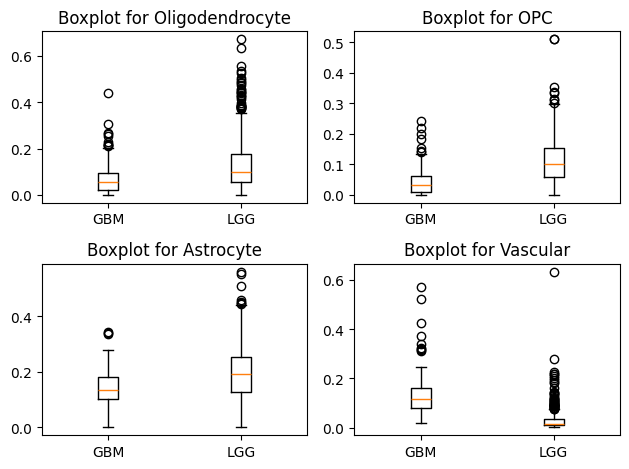

In [277]:
l_por = result[result['projectID'] == 'TCGA-LGG']
h_por = result[result['projectID'] == 'TCGA-GBM']

fig, axes = plt.subplots(2,2)

for ct, ax in zip(['Oligodendrocyte','OPC','Astrocyte','Vascular'], axes.flat) :
    h = h_por[ct].to_numpy()
    l = l_por[ct].to_numpy()

    ar = [h, l]
    ax.boxplot(ar)
    ax.set_title(f'Boxplot for {ct}')
    ax.set_xticks([1, 2], ['GBM', 'LGG'])

plt.tight_layout()
plt.show()

In [246]:
l_por = result[result['projectID'] == 'TCGA-LGG']
l_por.head()

,Mixture,M1,Malignant,Oligodendrocyte,CD8T,CD4T,Treg,OPC,Vascular,Astrocyte,P-value,Correlation,RMSE,projectID
169,TCGA_CS_4938_01B,0.049514,0.494132,0.116082,0.0,0.040666,0.002341,0.028124,0.009569,0.259571,9999.0,0.155325,1.010733,TCGA-LGG
170,TCGA_CS_4941_01A,0.086651,0.351257,0.161974,0.0,0.001259,0.039975,0.044190,0.049911,0.264784,9999.0,0.331044,0.945063,TCGA-LGG
171,TCGA_CS_4942_01A,0.086463,0.462541,0.118846,0.0,0.002906,0.047207,0.084394,0.007601,0.190041,9999.0,0.293631,0.956513,TCGA-LGG
172,TCGA_CS_4943_01A,0.063332,0.616333,0.064647,0.0,0.062719,0.000000,0.104778,0.012629,0.075562,9999.0,0.487988,0.911306,TCGA-LGG
173,TCGA_CS_4944_01A,0.059611,0.400622,0.097650,0.0,0.051068,0.000000,0.035127,0.014016,0.341906,9999.0,0.448482,0.894039,TCGA-LGG


In [249]:
oligo = l_por['Oligodendrocyte'].to_numpy()
opc = l_por['OPC'].to_numpy()

In [251]:
ex_ar = np.array([oligo, opc])
ex_ar

array([[0.11608205, 0.16197377, 0.11884598, ..., 0.0164216 , 0.12971215,
        0.04329498],
       [0.02812419, 0.04418988, 0.08439361, ..., 0.053643  , 0.02030081,
        0.12703372]])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90721732e0>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7f9071485880>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x7f9072173550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9071485dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9071485340>,
 'means': []}

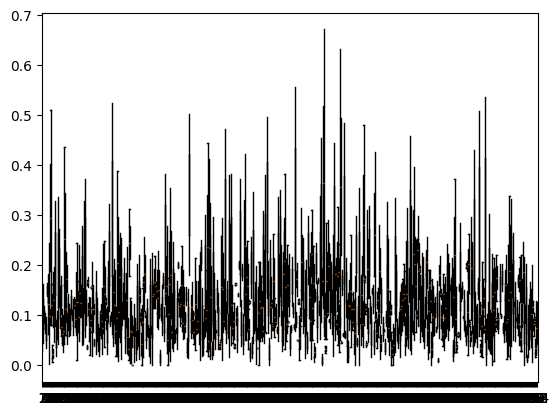

In [254]:
plt.boxplot(ex_ar)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90701f31f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90703bf6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f907043a3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f907026ac40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f906b32a670>,
 'means': []}

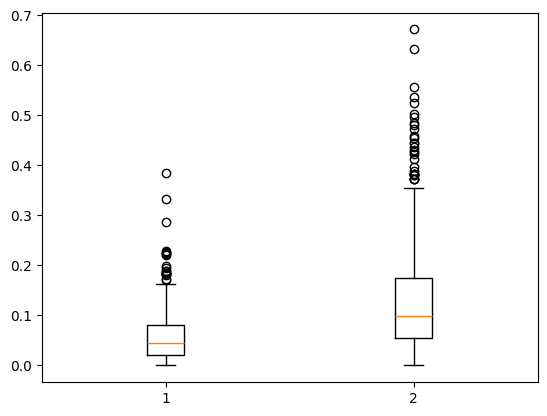

In [255]:
l_por = result[result['projectID'] == 'TCGA-LGG']
ex_array = [l_por['M1'].to_numpy(), l_por['Oligodendrocyte'].to_numpy()]

plt.boxplot(ex_array)


In [232]:
ex_array

array([0.04951402, 0.08665073, 0.08646346, 0.06333197, 0.05961128,
       0.0168965 , 0.08616355, 0.00227743, 0.0340616 , 0.01775981,
       0.06337868, 0.03999433, 0.07307556, 0.11698998, 0.18864429,
       0.05776279, 0.04998126, 0.00389421, 0.        , 0.01930809,
       0.0354658 , 0.05566714, 0.06672756, 0.04807628, 0.08238559,
       0.03018604, 0.02281195, 0.        , 0.03585562, 0.0349954 ,
       0.03788547, 0.04116221, 0.03877163, 0.05937694, 0.04698532,
       0.03937625, 0.02674091, 0.00580278, 0.01835594, 0.00076688,
       0.05835182, 0.02590968, 0.02258024, 0.01021584, 0.12456314,
       0.02831498, 0.07852616, 0.        , 0.03173514, 0.06133511,
       0.054149  , 0.06004083, 0.09516408, 0.04080189, 0.02807901,
       0.02976199, 0.09185724, 0.05584932, 0.02295736, 0.04342634,
       0.04256955, 0.12379729, 0.09186861, 0.        , 0.06487692,
       0.00977294, 0.02694553, 0.08018509, 0.05555769, 0.07100513,
       0.13884015, 0.02194423, 0.03527984, 0.09696707, 0.08030

In [ ]:
plt.figure(figsize = (10,10))

In [199]:
fil_lgg = result[(result['Correlation'] >= 0.77)&(result['projectID'] == 'TCGA-LGG')]
len(fil_lgg)

5

In [200]:
fil_gbm = result[(result['Correlation'] >= 0.66)&(result['projectID'] == 'TCGA-GBM')]
len(fil_gbm)

5

In [201]:
fil_r = pd.concat([fil_lgg, fil_gbm])
fil_r

,Mixture,M1,Malignant,Oligodendrocyte,CD8T,CD4T,Treg,OPC,Vascular,Astrocyte,P-value,Correlation,RMSE,projectID
208,TCGA_DB_A64L_01A,0.000767,0.509885,0.065878,0.0,0.044398,0.004576,0.126248,0.009276,0.238972,9999.0,0.790250,0.747397,TCGA-LGG
286,TCGA_DU_7019_01A,0.063242,0.403607,0.062987,0.0,0.051935,0.000000,0.079030,0.037511,0.301687,9999.0,0.800387,0.707944,TCGA-LGG
516,TCGA_HW_7487_01A,0.021350,0.365450,0.178935,0.0,0.040355,0.000000,0.166757,0.002848,0.224306,9999.0,0.788285,0.753974,TCGA-LGG
544,TCGA_P5_A5F4_01A,0.017888,0.481011,0.120954,0.0,0.049438,0.000000,0.102176,0.012755,0.215779,9999.0,0.781615,0.766627,TCGA-LGG
658,TCGA_TM_A84R_01A,0.000000,0.357905,0.221280,0.0,0.027149,0.000000,0.128673,0.011950,0.253042,9999.0,0.770019,0.750760,TCGA-LGG
2,TCGA_02_2483_01A,0.088461,0.626382,0.011607,0.0,0.096792,0.003054,0.024594,0.117162,0.031949,9999.0,0.660645,0.850749,TCGA-GBM
52,TCGA_06_2563_01A,0.075073,0.506191,0.049044,0.0,0.056906,0.016230,0.037649,0.135581,0.123326,9999.0,0.675794,0.835726,TCGA-GBM
79,TCGA_12_3653_01A,0.083340,0.516397,0.015560,0.0,0.015070,0.054800,0.032918,0.115369,0.166546,9999.0,0.666509,0.827770,TCGA-GBM
86,TCGA_14_0790_01B,0.024177,0.459616,0.013061,0.0,0.031136,0.007500,0.045119,0.073976,0.345416,9999.0,0.684854,0.760455,TCGA-GBM
91,TCGA_14_1402_02A,0.083807,0.437674,0.066583,0.0,0.152060,0.007842,0.000000,0.076675,0.175359,9999.0,0.699630,0.780735,TCGA-GBM


In [183]:
sam75 = fil_r.Mixture.unique()
sam75

array(['TCGA_DB_A64L_01A', 'TCGA_DU_7019_01A', 'TCGA_HW_7487_01A',
       'TCGA_P5_A5F4_01A', 'TCGA_TM_A84R_01A', 'TCGA_02_2483_01A',
       'TCGA_06_2563_01A', 'TCGA_12_3653_01A', 'TCGA_14_0790_01B',
       'TCGA_14_1402_02A'], dtype=object)

In [208]:
fil_r = result[result['Mixture'].isin(sam75)].sort_values(by='projectID', ascending=False)
fil_r

,Mixture,M1,Malignant,Oligodendrocyte,CD8T,CD4T,Treg,OPC,Vascular,Astrocyte,P-value,Correlation,RMSE,projectID
208,TCGA_DB_A64L_01A,0.000000,0.562474,0.059419,0.0,0.021703,0.008761,0.117510,0.007462,0.222672,9999.0,0.699847,0.802275,TCGA-LGG
286,TCGA_DU_7019_01A,0.058655,0.486149,0.051164,0.0,0.029151,0.001027,0.056574,0.027308,0.289973,9999.0,0.804236,0.721687,TCGA-LGG
516,TCGA_HW_7487_01A,0.000000,0.473636,0.169052,0.0,0.025047,0.000000,0.123063,0.000000,0.209201,9999.0,0.787314,0.771606,TCGA-LGG
544,TCGA_P5_A5F4_01A,0.000000,0.621607,0.113192,0.0,0.025143,0.000000,0.043902,0.008679,0.187477,9999.0,0.788778,0.791698,TCGA-LGG
658,TCGA_TM_A84R_01A,0.005538,0.427990,0.206304,0.0,0.000000,0.000000,0.108026,0.005253,0.246889,9999.0,0.746506,0.772576,TCGA-LGG
2,TCGA_02_2483_01A,0.083006,0.707200,0.005139,0.0,0.059153,0.011706,0.000000,0.104177,0.029617,9999.0,0.669432,0.862169,TCGA-GBM
52,TCGA_06_2563_01A,0.085234,0.558501,0.054499,0.0,0.004184,0.050539,0.018759,0.125976,0.102306,9999.0,0.682680,0.848100,TCGA-GBM
79,TCGA_12_3653_01A,0.106984,0.511731,0.013673,0.0,0.000000,0.061181,0.046414,0.111209,0.148807,9999.0,0.626831,0.849142,TCGA-GBM
86,TCGA_14_0790_01B,0.024573,0.516181,0.004069,0.0,0.014115,0.005803,0.036646,0.069683,0.328930,9999.0,0.685607,0.769780,TCGA-GBM
91,TCGA_14_1402_02A,0.083083,0.463227,0.057743,0.0,0.152843,0.002728,0.000000,0.073844,0.166532,9999.0,0.685143,0.789802,TCGA-GBM


In [209]:
ct_col = {'Malignant' : 'darkorange',       
          'M1' : 'mediumaquamarine',
          'CD8T' : 'crimson',
          'CD4T' : 'lime',
          'Treg' : 'deepskyblue',
          'Astrocyte' : 'tomato',
          'Oligodendrocyte' : 'seagreen',
          'OPC' : 'pink',
          'Vascular' : 'cadetblue'}

In [210]:
melt_df = fil_r.melt(id_vars = 'Mixture', value_name = 'proportion', var_name = 'celltype')
melt_df = melt_df[melt_df['celltype'].isin(ct_col.keys())].reset_index(drop=True)
melt_df.head()

,Mixture,celltype,proportion
0,TCGA_DB_A64L_01A,M1,0.0
1,TCGA_DU_7019_01A,M1,0.058655
2,TCGA_HW_7487_01A,M1,0.0
3,TCGA_P5_A5F4_01A,M1,0.0
4,TCGA_TM_A84R_01A,M1,0.005538


/tmp/ipykernel_2581132/1212418785.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.0 0.0586548783404035 0.0 0.0 0.0055383166528398 0.0830060965862664
 0.0852340210886932 0.1069842465168296 0.0245731650004486
 0.0830833418546529]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bottoms[category_data['Mixture']] += category_data['proportion'].values


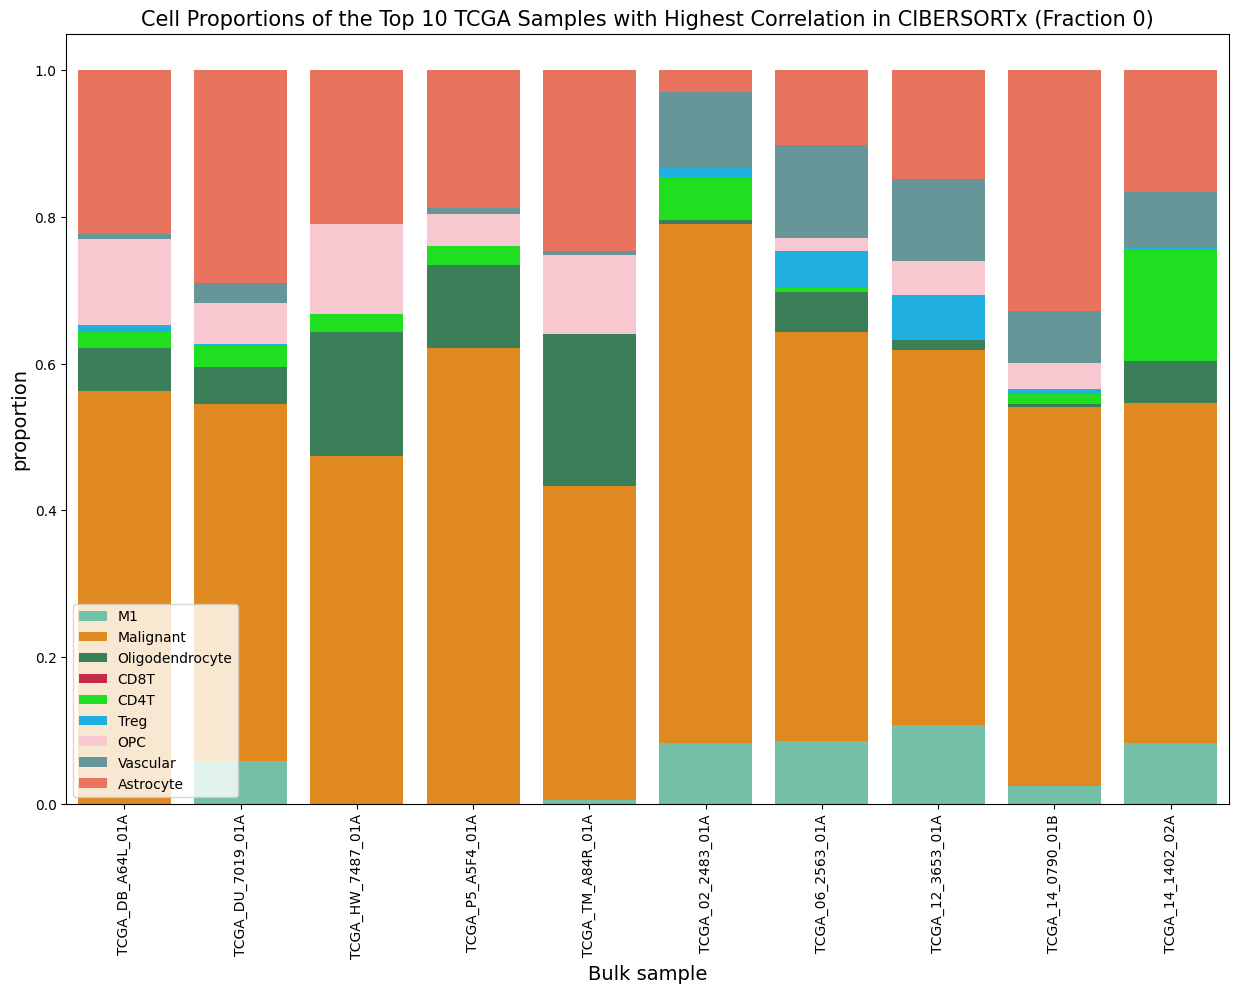

In [211]:
plt.figure(figsize = (15,10))

df = melt_df.copy()
bottoms = pd.Series([0] * len(df['Mixture'].unique()), index=df['Mixture'].unique())
for category in df['celltype'].unique():
    category_data = df[df['celltype'] == category]
    sns.barplot(x='Mixture', y='proportion', data=category_data,
                color = ct_col[category], bottom=bottoms, label = category)
    bottoms[category_data['Mixture']] += category_data['proportion'].values

plt.xticks(rotation=90)
plt.title('Cell Proportions of the Top 10 TCGA Samples with Highest Correlation in CIBERSORTx (Fraction 0)', fontsize = 15)
plt.ylabel('proportion', fontsize = 14)
plt.xlabel('Bulk sample', fontsize = 14)

plt.legend(loc='lower left')

plt.savefig(f'/data_hdd5/yuseong/cs-expression/analysis/cibersortx/plot/gtf_fraction0_TCGA_results.png', bbox_inches='tight')

In [282]:
import csv
ME_centric = '/data_hdd5/yuseong/cs-expression/tools/MicroExonator/Round1/TOTAL/TOTAL.sam.row_ME.filter1.ME_centric'
for row in csv.reader(open(ME_centric), delimiter = '\t'):
    if len(row) != 12 :
        print(row)


[]
